***Diabetes Regression***

In [100]:
# Import Necesary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [101]:
# load the diabetes dataset 
df = pd.read_csv('diabetes_dirty.csv')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [102]:
# Dependent variable is named 'progression' and others are 
# independent variables
X = df.iloc[:, [0, 2, 3]].values
Y = df.iloc[:, -1].values

In [103]:
# Check the selected X values for the first three rows as an example
print("X values from rows 1 to 4:\n", X[1:4])

X values from rows 1 to 4:
 [[48.  21.6 87. ]
 [72.  30.5 93. ]
 [24.  25.3 84. ]]


In [104]:
# Get training and test sets with 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [105]:
# Scale the data to ensure that all features contribute equally to 
# the model
# StandardScaler will standardize features by removing the mean and 
# scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

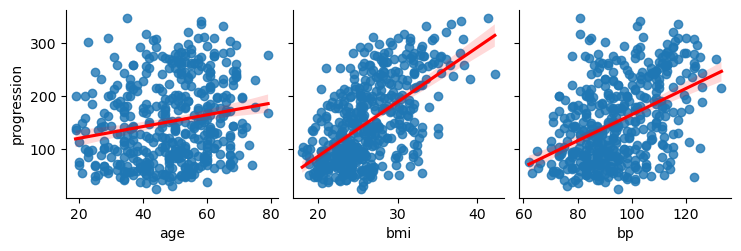

In [106]:
X_vars = df.iloc[:, [0, 2, 3]]
Y_var = df.iloc[:, -1] 
plot_data = pd.concat([X_vars, Y_var], axis=1)
plot_data.columns = ['age', 'bmi', 'bp', 'progression'] 
# Plot pairplot with progression on the y-axis
sns.pairplot(data=plot_data, x_vars=['age', 'bmi', 'bp'], 
             y_vars='progression', kind='reg', 
             plot_kws={'line_kws':{'color':'red'}})

# Show the plot
plt.show()

In [107]:
# Generate a multiple linear regression model 
# LinearRegression will find the best-fit line through the training data
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

The intercept is the value of Y when all X are 0, and coefficients indicate the change in Y per unit change in X

In [108]:
# Print intercept and coefficient 
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 153.73654390934857
Coefficients: [ 2.23926223 39.47144184 18.40206009]


The model will predict Y values for the X values in the test set

In [109]:
# Generate predictions for test set 
Y_pred = model.predict(X_test_scaled)

R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variables

In [110]:
# Compute the R-squared value to evaluate the model's performance 
# on the test set
r2 = r2_score(Y_test, Y_pred)
print("R-squared on test set:", r2)

R-squared on test set: 0.2909156196410876


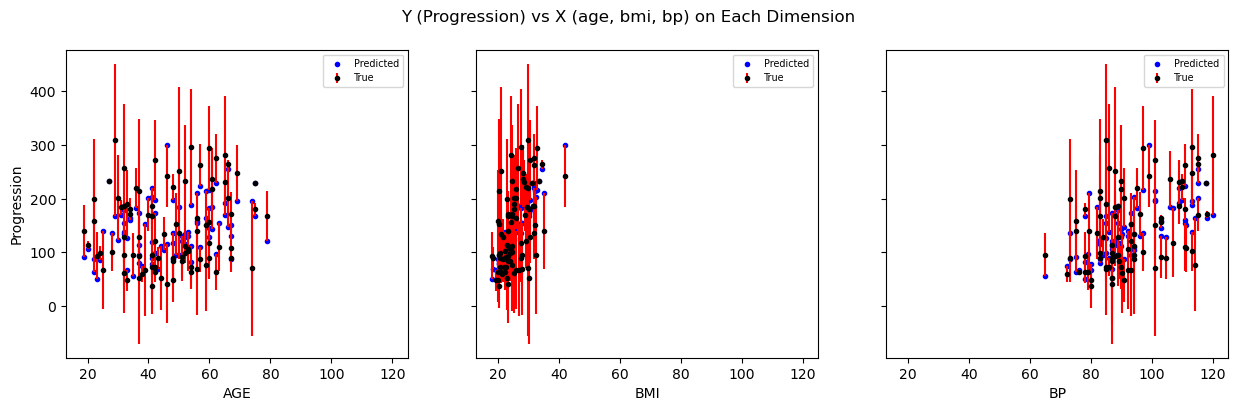

In [111]:
# Plot the errors for each dimension (age, bmi, bp)
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, 
                       figsize=(15, 4))
fig.suptitle("Y (Progression) vs X (age, bmi, bp) on Each Dimension")

# Get values for the error bars
error_bar_values = np.abs(Y_test - Y_pred)

# Plot data, predicted values, and error bars for each independent variable
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], Y_test, yerr=error_bar_values, fmt='.k', 
                   ecolor='red', label='True')
    ax[i].scatter(X_test[:, i], Y_pred, c='b', marker='.', label='Predicted')
    
    # Label x-axis with column names
    ax[i].set_xlabel(df.columns[[0,2,3][i]])  
    ax[i].legend(loc='best', fontsize='x-small')

ax[0].set_ylabel('Progression')  # Set y-axis label
plt.show()

The graphs depict the relationship between diabetes progression (on the y-axis) and three different features: age, BMI, and blood pressure (BP) (on the x-axes)

AGE vs. Progression
-The plot shows how diabetes progression varies with age.
-The black points represent the true values of diabetes progression, while the blue points represent the predicted values from a regression model.
-The red vertical lines are error bars, showing the difference between predicted and true values for each point.
-There seems to be a significant spread, indicating some variability in the model's predictions for different ages.

 Age might not be the most reliable predictor of diabetes progression on its own, as there is a significant variance in the model's predictions. The wider the red bars, the less accurate the model is at predicting progression based on age alone. It might suggest that age has a more complex, non-linear relationship with diabetes progression that the current model isn't capturing well.

BMI vs. Progression
-This graph shows the relationship between Body Mass Index (BMI) and diabetes progression.
-The error bars are quite prominent, indicating that the model may have larger discrepancies between predicted and true values for some BMI values.
-It suggests that BMI might have a wide-ranging impact on progression, but the model struggles to predict it accurately for certain BMI values.

    The clustering of points in certain BMI ranges (especially between 20 and 40) shows that many individuals share similar BMI values, but their progression values vary significantly. This could suggest that while BMI is an important factor in diabetes progression, it cannot fully explain the variance in progression by itself. It is likely that other factors (such as diet, genetics, or lifestyle) play a role. The wide error bars suggest that BMI alone doesn't give enough information to make accurate predictions for many individuals.

BP vs. Progression
-The third plot shows how blood pressure correlates with diabetes progression.
-This feature seems to have a similar spread to BMI, with predictions deviating from true values in some cases.

    The model seems to have difficulty predicting diabetes progression for people with higher BP values. Similar to BMI, this suggests that while blood pressure may have a relationship with diabetes progression, it is not sufficient by itself for strong predictions. The scatter and error sizes imply that other interactions between BP and other features may be more influential in progression, which the model isn't fully capturing.

The graphs imply that age, BMI, and BP are influential but insufficient predictors of diabetes progression when considered individually. It’s possible that diabetes progression is influenced by multiple features acting in combination (e.g., age + BMI + BP), and the model might benefit from including interaction terms or additional features like cholesterol levels, insulin sensitivity, or genetic markers.